# Прогнозирование оттока клиентов

## Описание проекта
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о клиентах и  расторжении договоров с банком. 

## План работ
1. Загрузить и подготовить данные. Пояснить порядок действий.
2. Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.
3. Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.
4. Провести финальное тестирование.

## Описание данных

### Признаки
*RowNumber* — индекс строки в данных

*CustomerId* — уникальный идентификатор клиента

*Surname* — фамилия

*CreditScore* — кредитный рейтинг

*Geography* — страна проживания

*Gender* — пол

*Age* — возраст

*Tenure* — количество недвижимости у клиента

*Balance* — баланс на счёте

*NumOfProducts* — количество продуктов банка, используемых клиентом

*HasCrCard* — наличие кредитной карты

*IsActiveMember* — активность клиента

*EstimatedSalary* — предполагаемая зарплата

### Целевой признак
*Exited* — факт ухода клиента

---
# 1. Подготовка данных

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,  f1_score,  roc_auc_score,  precision_recall_curve, roc_curve
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Чтение датасета
data_churn = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Изучаем данные
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
data_churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
data_churn['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [10]:
data_churn['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

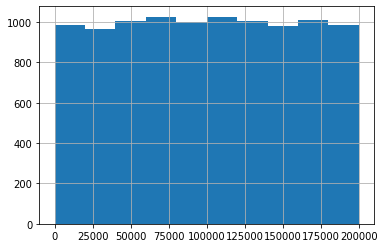

In [11]:
data_churn['EstimatedSalary'].hist()

In [12]:
# Удаляем ненужные столбцы RowNumber и Surname
data_churn_wt = data_churn.drop(columns=['RowNumber', 'Surname']) #,'Geography'])

In [13]:
# Пропуски в столбце Tenure (количество недвижки) заменим на 0
#data_churn_wt['Tenure'] = data_churn_wt['Tenure'].fillna(0)

In [14]:
# По рекомендации ревьювера из датасета убрал объекты с пропусками в столбце Tenure (количество недвижки)
#Метрики F1 и AUC-ROC после этого показали при тестировании модели более высокие значения
data_churn_wt = data_churn_wt.dropna(subset = ['Tenure'])

In [15]:
data_churn_wt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
CustomerId         9091 non-null int64
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 923.3+ KB


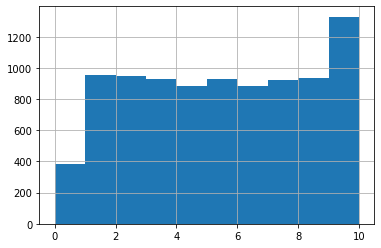

In [16]:
data_churn_wt['Tenure'].hist()

In [17]:
# Переводим признак Gender из категорийных в численные техникой OHE
data_churn_wt = pd.get_dummies(data_churn_wt, columns = ['Gender'], drop_first=True)

In [18]:
# Переводим признак Geography из категорийных в численные техникой OE - нет, не годится для логистической регрессии
#Geo = [['France', 0], ['Germany', 1], ['Spain', 2]]
#encoder = OrdinalEncoder()
#data_churn_wt = pd.DataFrame(encoder.fit_transform(data_churn_wt,Geo), columns=data_churn_wt.columns)

In [19]:
# Переводим признак Geography из категорийных в численные техникой OHE
data_churn_wt = pd.get_dummies(data_churn_wt, columns = ['Geography'])

In [20]:
# Столбец CustomerId делаем индексом
data_churn_wt_id = data_churn_wt.set_index('CustomerId')
data_churn_wt_id.index.name = None

In [21]:
# Разделяем признаки и целевой признак
target = data_churn_wt_id['Exited']
features = data_churn_wt_id.drop('Exited', axis=1)

In [22]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
15634602,619,42,2.0,0.00,1,1,1,101348.88,0,1,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
15619304,502,42,8.0,159660.80,3,1,0,113931.57,0,1,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [23]:
target.head()

15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
Name: Exited, dtype: int64

In [24]:
# Разбиваем датасет на выборки (обучающую, проверочную, тестовую)
features_train, features_VT, target_train, target_VT = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_VT, target_VT, test_size=0.5, random_state=12345)

In [25]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
15634602,619,42,2.0,0.00,1,1,1,101348.88,0,1,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
15619304,502,42,8.0,159660.80,3,1,0,113931.57,0,1,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15719294,800,29,2.0,0.00,2,0,0,167773.55,0,1,0,0
15606229,771,39,5.0,0.00,2,1,0,96270.64,1,1,0,0
15569892,516,35,10.0,57369.61,1,1,1,101699.77,1,1,0,0
15584532,709,36,7.0,0.00,1,0,1,42085.58,0,1,0,0


In [26]:
# Масштабируем признаки
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_France','Geography_Germany','Geography_Spain']
scaler = StandardScaler()
scaler.fit(features_train)

features_train = features_train.copy()
features_train[numeric] = scaler.transform(features_train[numeric])

features_valid = features_valid.copy()
features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test = features_test.copy()
features_test[numeric] = scaler.transform(features_test[numeric])

In [27]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
15720050,0.809075,-1.039327,-1.025995,0.554904,-0.908179,0.663468,-1.024127,0.019508,-1.107304,0.999633,-0.58229,-0.572128
15578096,-1.152518,-1.227561,0.696524,0.480609,-0.908179,-1.507231,-1.024127,0.056167,0.903094,0.999633,-0.58229,-0.572128
15598266,-0.398853,0.090079,1.385532,-1.237830,-0.908179,0.663468,0.976442,0.848738,0.903094,0.999633,-0.58229,-0.572128
15701200,-0.749875,-0.286389,0.352020,-1.237830,0.809300,0.663468,0.976442,-0.894953,0.903094,0.999633,-0.58229,-0.572128
15622443,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,-1.507231,0.976442,-1.284516,0.903094,0.999633,-0.58229,-0.572128


## Выводы по п.1

Что было сделано:

1. Загрузили датасет. В наборе 10000 объектов, пропуски лишь в столбце Tenure (кол-во недвижки).
2. Удалили ненужные столбцы RowNumber (индекс строки в данных) и Surname (фамилия). 
3. Пропуски в столбце Tenure (кол-во недвижки) заменили нулями (0), т.к. пропуск скорей всего означает, что недвижки у клиента нет.
4. Признак Gender (пол) перевели из категорийных в численные техникой OHE (прямым кодированием)
5. Признак Geography из категорийных в численные техникой OHE
6. Столбец CustomerId (уникальный идентификатор клиента) сделали индексом
7. Разделили датасет на признаки и целевой признак(Exited - факт ухода клиента)
8. Разбили датасет на выборки (обучающую, проверочную, тестовую)
9. Масштабировали признаки во всех трех выборках.

Данные к дальнейшей работе готовы.

---
# 2. Исследование задачи

0    0.7963
1    0.2037
Name: Exited, dtype: float64


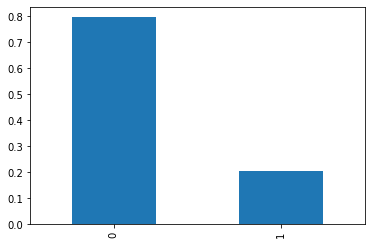

In [28]:
# Исследуем баланс классов
class_frequency = data_churn['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
# Только 20% клиентов уходит

In [29]:
# Обучим несбалансированную модель решающим деревом без учета дисбаланса
fin_accu_tree = 0

for depth in range(1, 21, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    
    predicted_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid, predicted_valid)
    
#    print('max_depth:',depth,'accuracy_valid:',accuracy_valid)

    #отбор
    if accuracy_valid > fin_accu_tree:
        fin_accu_tree = accuracy_valid
        fin_depth = depth
        fin_model_tree = model

print('РЕШАЮЩЕЕ ДЕРЕВО')
print('Максимальная доля правильных ответов (без баланса):',fin_accu_tree,'при глубине дерева:',fin_depth)
  

РЕШАЮЩЕЕ ДЕРЕВО
Максимальная доля правильных ответов (без баланса): 0.8591859185918592 при глубине дерева: 6


In [30]:
# Обучим модель логистической регрессией без учета дисбаланса
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train,target_train)
    
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
print('ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ')
print('Доля правильных ответов (без баланса):',accuracy_valid)
fin_model_logreg = model

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
Доля правильных ответов (без баланса): 0.8080308030803081


In [31]:
# Обучим модель случайным лесом без учета дисбаланса
# Подбираем глубину дерева в случайном лесу из 20 деревьев

fin_accu_tree = 0

for depth in range(1, 21, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,predicted_valid)
#    print(depth,'-',accuracy_valid)
    if accuracy_valid > fin_accu_tree:
        fin_accu_tree = accuracy_valid
        fin_depth = depth
        
print('Подбираем глубину дерева в случайном лесу')
print('Максимальная доля правильных ответов для несбаланированной валидационной выборки:',fin_accu_tree,'при глубине дерева:',fin_depth)

Подбираем глубину дерева в случайном лесу
Максимальная доля правильных ответов для несбаланированной валидационной выборки: 0.8657865786578658 при глубине дерева: 8


In [32]:
fin_estim = 1
fin_accu_forest = 0

for estim in range(1, 121, 1):
    model = RandomForestClassifier(n_estimators=estim, max_depth=fin_depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid,predicted_valid)    
#    print(estim,'-',accuracy_valid)
    if accuracy_valid > fin_accu_forest:
        fin_accu_forest = accuracy_valid
        fin_estim = estim
        fin_model_forest = model
        fin_predicted_valid = predicted_valid

In [33]:
print('СЛУЧАЙНЫЙ ЛЕС')
print('Максимальная доля правильных ответов для несбаланированной валидационной выборки:',fin_accu_forest,'при количестве деревьев:',fin_estim)

СЛУЧАЙНЫЙ ЛЕС
Максимальная доля правильных ответов для несбаланированной валидационной выборки: 0.8679867986798679 при количестве деревьев: 44


In [34]:
# Выбираем в дальнейшем модель, обученную случайным лесом, так как у нее максимальная доля правильных ответов (0.8675) 
# и методику "случайный лес" для дальнейшей работы со сбалансированной выборкой

In [35]:
# F1-мера 
f1 = f1_score(target_valid, fin_predicted_valid, average='binary')
print('F1-мера при обучении модели случайным лесом по несбалансированной выборке',f1)

F1-мера при обучении модели случайным лесом по несбалансированной выборке 0.5804195804195804


In [36]:
# Функция получения AUC-ROC
def aucroc(model,target,features):
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target,probabilities_one_valid)
    return auc_roc

In [37]:
# AUC-ROC
print('AUC-ROC',aucroc(fin_model_forest,target_valid,features_valid))

AUC-ROC 0.8721433870157218


In [38]:
fin_predicted_valid = pd.Series(fin_predicted_valid, index=features_valid.index)

In [39]:
fin_predicted_valid

15630592    1
15665879    0
15738828    1
15602979    0
15733111    0
           ..
15660528    0
15671969    0
15788775    0
15670822    0
15726403    0
Length: 1818, dtype: int64

## Выводы по п.2

Что сделали:

1. Изучили баланс классов (0 - 0.7963, 1 - 0.2037). Судя по выборке, только 20% клиентов расторгают договор с банком.
2. Обучили модель без учета дисбаланса различными методами (логистическая регрессия, решающее дерево, случайный лес). Лучший результат у модели, обученной случайным лесом (accuracy = 0.8675). В дальнейшем для обучения моделей на сбалансированной выборке будем использовать случайный лес с гиперпараметрами n_estimators = 101 и max_depth = 12.
3. Измерили F1-меру: 0.5954

Дальше сбалансируем классы тренировочной выборки и измеряем F1 и AUC-ROC

---
# 3. Борьба с дисбалансом

In [41]:
# Делаем веса классов сбалансированными
model1 = RandomForestClassifier(n_estimators=fin_estim, max_depth=fin_depth, random_state=12345, class_weight='balanced')
model1.fit(features_train, target_train)
predicted_valid = model1.predict(features_valid)
print("F1-мера при обучении модели по сбалансированной выборке случайным лесом", f1_score(target_valid, predicted_valid))

F1-мера при обучении модели по сбалансированной выборке случайным лесом 0.6453900709219859


In [42]:
# AUC-ROC
print('AUC-ROC',aucroc(model1,target_valid,features_valid))

AUC-ROC 0.8728419514152601


In [43]:
# Увеличиваем выборку

In [44]:
repeat = 4

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [46]:
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)

1    0.509964
0    0.490036
Name: Exited, dtype: float64


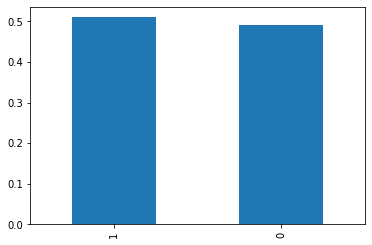

In [47]:
class_frequency = target_upsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [48]:
model2 = RandomForestClassifier(n_estimators=fin_estim, max_depth=fin_depth, random_state=12345)
model2.fit(features_upsampled, target_upsampled)
predicted_valid = model2.predict(features_valid)

print("F1-мера при обучении модели по увеличенной выборке случайным лесом:", f1_score(target_valid, predicted_valid))

F1-мера при обучении модели по увеличенной выборке случайным лесом: 0.6252771618625277


In [49]:
# AUC-ROC
print('AUC-ROC',aucroc(model2,target_valid,features_valid))

AUC-ROC 0.8721341832686924


In [50]:
# Уменьшаем выборку

In [51]:
fraction = 0.25

In [52]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [53]:
features_downsampled, target_downsampled = downsample(features_train, target_train, fraction)

1    0.509964
0    0.490036
Name: Exited, dtype: float64


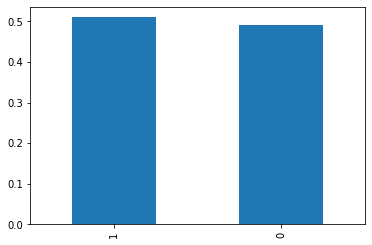

In [54]:
class_frequency = target_downsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [55]:
model3 = RandomForestClassifier(n_estimators=fin_estim, max_depth=fin_depth, random_state=12345)
model3.fit(features_downsampled, target_downsampled)

predicted_valid = model3.predict(features_valid)

print("F1-мера при обучении модели по уменьшенной выборке случайным лесом:", f1_score(target_valid, predicted_valid))

F1-мера при обучении модели по уменьшенной выборке случайным лесом: 0.5955383123181376


In [56]:
# AUC-ROC
print('AUC-ROC',aucroc(model3,target_valid,features_valid))

AUC-ROC 0.8676906142028542


## Выводы по п.3

Что сделали:

1. Сделали веса классов сбалансированными, обучили модель случайным лесом с полученными ранее гиперпараметрами (101 дерево с глубиной 12). F1-мера: 0.6127 (AUC-ROC: 0.8489). 

2. Увеличили тренировочную выборку (количество положительных объектов увеличили в 4 раза), обучили модель случайным лесом.
F1-мера: 0.6106 (AUC-ROC: 0.8422).

3. Уменьшили тренировочную выборку (количество отрицательных объектов уменьшили в 4 раза), обучили модель случайным лесом.
F1-мера: 0.5827 (AUC-ROC: 0.8440).

4. Максимальный показатель F1-меры получили при обучении модели с балансом классов (0.6127). Для тестирования на тестовой выборке будем использовать эту модель (model1) 

5. Дополнительно измеряли AUC-ROC. Если выбирать модель по значениям AUC-ROC, наиболее оптимальной также будет первая модель (model1), AUC-ROC: 0.8489.


---
# 4. Тестирование модели

In [57]:
#тестируем модель на тестовой выборке
predicted_test = model1.predict(features_test)
print("F1 для теста:", f1_score(target_test, predicted_test))

F1 для теста: 0.602258469259724


In [58]:
# AUC-ROC
print('AUC-ROC для теста',aucroc(model1,target_test,features_test))

AUC-ROC для теста 0.857879782947903


In [59]:
#accuracy
print('accuracy для теста',accuracy_score(target_test, predicted_test))

accuracy для теста 0.8257284222100055


In [60]:
# Проверка адекватности
# Создадим константную модель (любому объекту прогнозирует 0)
target_pred_constant = pd.Series(0, index=features.index)
accuracy = accuracy_score(target, target_pred_constant)
print('Доля правильных ответов константной модели',accuracy)

Доля правильных ответов константной модели 0.7960620393796062


## Выводы по п.4

Что сделали: 
1. Проверили F1-меру на тестовой выборке. F1-мера для тестовой выборки: 0.5907, что соответствует заданию проекта *довести метрику до 0.59*.

2. Измерили AUC-ROC: 0.8550.

3. Проверили адекватность модели: 
    * Создали константную модель, любому объекту прогнозирующую класс 0. 
    * Доля правильных ответов константной модели 0.7963, что меньше доли правильных ответов выбранной модели (0.8455).
    * Считаем, что модель прошла проверку на адекватность.

---
# Заключительные выводы

Все работы согласно плана выполнены:

1. Данные загружены и подготовлены, порядок действий пояснен.
2. Баланс классов исследован (80/20) - только 20% клиентов расторгают контракт с банком. 
3. Модели обучены тремя разными методами (логистическая регрессия, решающее дерево, случайный лес) без учёта дисбаланса. Максимальную долю правильных ответов показала модель, обученная случайным лесом со следующими подобранными гиперпараметрами: число деревьев = 101, глубина дерева = 12. 
4. Улучшили качество модели, учитывая дисбаланс классов. Обучили модели методом случайный лес с подобранными ранее гиперпараметрами разными способами решая проблему дисбаланса:
    * указывая при обучении параметр class_weight='balanced'(сделали веса классов сбалансированными).
    * увеличивая тренировочную выборку.
    * уменьшая тренировочную выборку.
5. Выбрали лучшую модель c F1=0.6127 (и AUC-ROC=0.8489), полученную при обучении со сбалансироваными весами классов.
6. Провели финальное тестирование выбранной модели на тестовой выборке, получили F1 для теста: 0.5907, что соответствует задаче проекта (довести метрику до 0.59). 
7. Дополнительно замерили AUC-ROC для теста: 0.8550.
8. Проверили модель на адекватность - модель проверку прошла.